   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

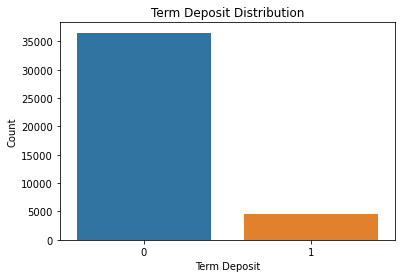

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = pd.read_csv(r"C:\Users\Hiremath\OneDrive\Desktop\CAR PHOTO\DEPOSIT\bank-additional-full.csv", sep=";")

# Explore the dataset
print(dataset.head())  # Print the first few rows of the dataset
print(dataset.describe())  # Statistical summary of the dataset

# Data preprocessing
# Assuming the target variable is "y" - the term deposit
# Convert categorical variables into numeric using one-hot encoding
dataset = pd.get_dummies(dataset)

# Split the dataset into features (X) and target (y) variables
X = dataset.drop('y_yes', axis=1)
y = dataset['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Data visualization
# Create a bar plot of the term deposit distribution
sns.countplot(x='y_yes', data=dataset)
plt.title('Term Deposit Distribution')
plt.xlabel('Term Deposit')
plt.ylabel('Count')
plt.show()
